# コンピュータ基礎
## 第1回
## 参考資料
- https://www.kaggle.com/code/faressayah/signal-processing-with-python

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import signal

sns.set_theme()

## 連続信号の作成

正弦波(sin関数)を足し合わせたものを連続信号として作成します。
$$y(t) = A_1 * \sin (2\pi f_1 t) + A_2 \sin (2 \pi f_2 t)$$
ここで$A_1, A_2$はsin関数の振幅、$\pi$は円周率、$f_1, f_2$は周波数、$t$は時間です。詳細は信号処理等のテキストを参照してください。ここでは単に連続信号をアナログデータの例としてこの曲線を考えます。この関数はanalog_signal()という名前で以下に定義しています。

In [4]:
def analog_signal(t, A_1=1.2, A_2=1.2/0.5, f_1=0.3, f_2=2*0.3):
  y = A_1 * np.sin(2*np.pi*f_1*t) + A_2 * np.sin(2*np.pi*f_2*t)

  return y



この関数を時間区間$[-5, 5]$でプロットしたものが次のグラフになります。

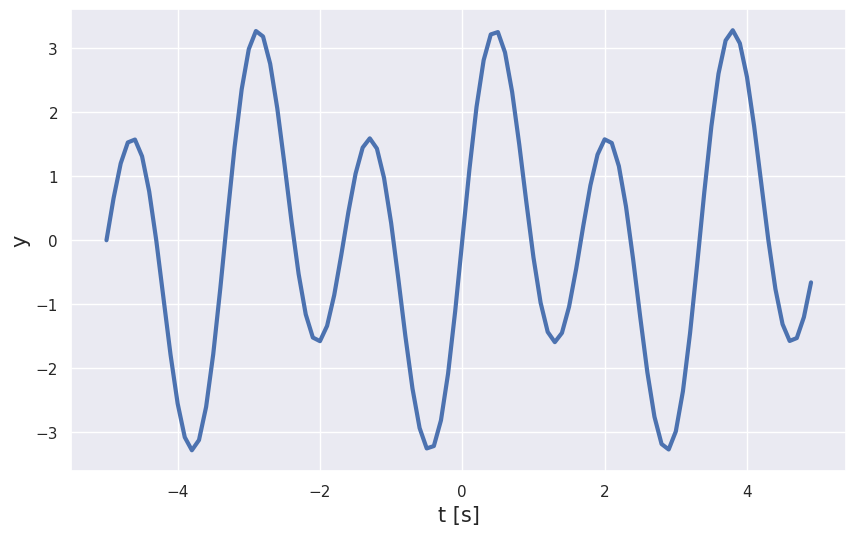

In [12]:
t_min = -5
t_max = 5
t_interval = 0.1
t = np.arange(t_min, t_max, t_interval)
y = analog_signal(t)

plt.figure(figsize=(10, 6))
plt.plot(t, y, linewidth=3)
plt.xlabel('t [s]' , fontsize=15)
plt.ylabel('y', fontsize=15);

## 信号の標本化（サンプリング）
先ほど作成した関数を**標本化**します。標本化はサンプリングとも言います。標本化はアナログデータを一定の時間間隔で区切り、その時間ごとの信号レベルを標本として抽出する処理となります。0.5秒おきに連続信号を読み取るとします。
以下のプログラムでは読み取る時間間隔をt_intervalに設定しています。

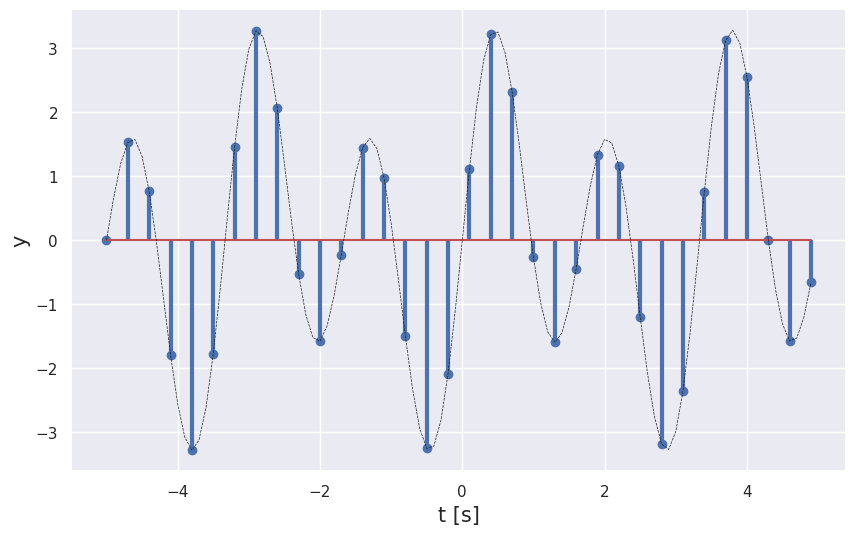

In [13]:
t_interval = 0.3
t_sampled= np.arange(t_min, t_max, t_interval) # 0.5秒おきに取り出す
y_sampled = analog_signal(t_sampled)

plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(t_sampled, y_sampled)
plt.setp(stemlines, 'linewidth', 3)
plt.plot(t, y, 'k--', linewidth=0.5)

plt.xlabel('t [s]' , fontsize = 15)
plt.ylabel('y', fontsize = 15);

## 信号の量子化

サンプリングされた信号を**量子化**します。量子化は、信号の振幅を離散的な値に変換するプロセスです。ここでは、`n_bits`（ビット数）を指定することで、`2^n_bits`個の量子化レベルに信号を分割します。例えば、`n_bits=2`の場合、`2^2 = 4`つのレベルに信号が変換されます。

以下のコードでは、サンプリングされた信号 `y_sampled` の最小値と最大値に基づいて、均一な量子化レベルを設定し、各サンプリング点を対応する量子化レベルに丸めています。その後、元の連続信号とサンプリング点とともに、量子化された信号をプロットします。

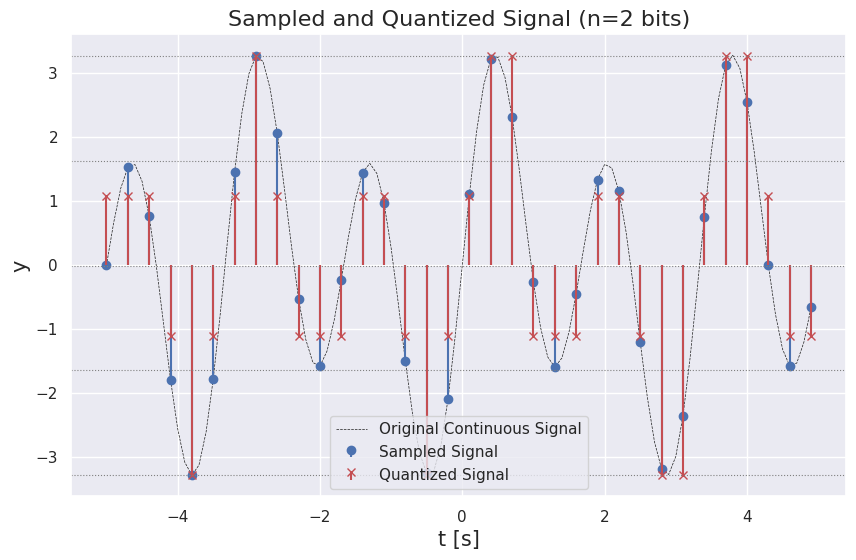

In [11]:
n_bits = 2 # 量子化ビット数
quantization_levels = 2**n_bits # 量子化レベル数

min_y_sampled = np.min(y_sampled)
max_y_sampled = np.max(y_sampled)

# 量子化ステップサイズを計算
step_size = (max_y_sampled - min_y_sampled) / quantization_levels

# 各量子化レベルの中心値を計算
# 例えば、4レベルの場合、0.5*step_size, 1.5*step_size, 2.5*step_size, 3.5*step_size (offset by min_y_sampled)
quant_level_values = np.linspace(min_y_sampled + step_size/2, max_y_sampled - step_size/2, quantization_levels)

# サンプリングされた信号を量子化
# 値を0からquantization_levels-1の範囲にスケーリングし、最も近い整数に丸め、元のスケールに戻す
scaled_y_sampled = (y_sampled - min_y_sampled) / (max_y_sampled - min_y_sampled)
quantized_indices = np.round(scaled_y_sampled * (quantization_levels - 1))
y_quantized = min_y_sampled + quantized_indices * (max_y_sampled - min_y_sampled) / (quantization_levels - 1)


plt.figure(figsize=(10, 6))

# 元の連続信号
plt.plot(t, y, 'k--', linewidth=0.5, label='Original Continuous Signal')

# サンプリングされた信号
markerline_sampled, stemlines_sampled, baseline_sampled = plt.stem(t_sampled, y_sampled, linefmt='b-', markerfmt='bo', basefmt=' ', label='Sampled Signal')
plt.setp(stemlines_sampled, 'linewidth', 1.5)

# 量子化された信号
markerline_quantized, stemlines_quantized, baseline_quantized = plt.stem(t_sampled, y_quantized, linefmt='r-', markerfmt='rx', basefmt=' ', label='Quantized Signal')
plt.setp(stemlines_quantized, 'linewidth', 1.5)

# 量子化レベルを示す水平線
# 各量子化レベルの境界線を描画
for i in range(quantization_levels + 1):
    level_boundary = min_y_sampled + i * step_size
    plt.axhline(y=level_boundary, color='gray', linestyle=':', linewidth=0.8)

plt.xlabel('t [s]', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title(f'Sampled and Quantized Signal (n={n_bits} bits)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()